# Week 2 - Assignment

#### Roshana Mojtaba - 2050955
#### Attar Aidin - 2048654
#### Amjadi Bahador - 2040470
#### Joulaei Vijouyeh Roya - 2050954

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout, Dense
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


%run nonlinear_function.py

## Exercise 1

Regular set: 2
Reduced set: 2
Increased set: 2
Augmented set: 2
Regular data		: 4000			train		: 3200
Reduced data		: 2000			train		: 1600
Increased data		: 8000			train		: 6400
Augmented data		: 40000			train		: 32000


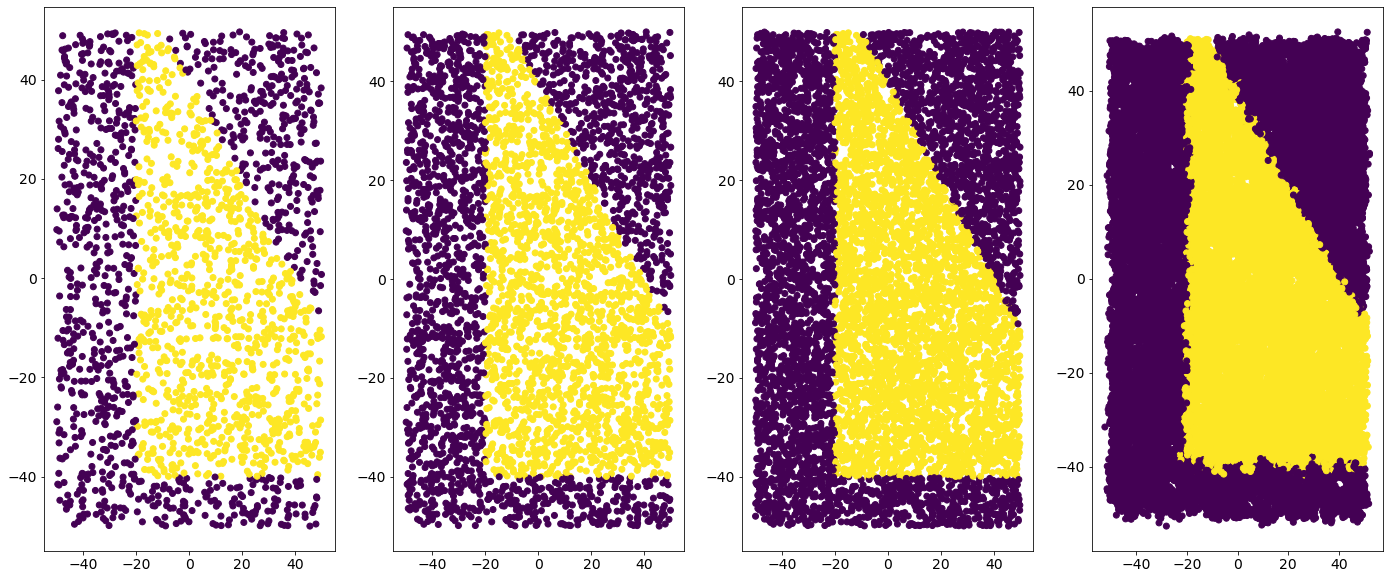

In [18]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)

x_aug = np.zeros( shape = (x.shape[0] * 10, x.shape[1]) )
y_aug = np.zeros( shape = y.shape[0] * 10 )
for i in range( x.shape[0] ):
    S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
    x_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
    y_aug[i*10:i*10+10] = y[i]
N_aug = len(x_aug)

#dim of a sample
L = len(x[0])
print('Regular set:', L)

L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)

L_aug = len(x_aug[0])
print('Augmented set:', L_inc)


N_train_red = int( perc_train * N_red )
N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
N_train_aug = int( perc_train * N_aug )
print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')
print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

fig, ax = plt.subplots(ncols = 4, figsize = (24,10))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x    [:,0],x    [:,1],c=y    )
ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Split training and test data

In [19]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [20]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [21]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


In [22]:
(x_train_aug, y_train_aug) = (x_aug[:N_train_aug],y_aug[:N_train_aug])
(x_valid_aug, y_valid_aug) = (x_aug[N_train_aug:],y_aug[N_train_aug:])
print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))

Train: 32000 	 Validation: 8000


### Rescale input data

In [23]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

In [24]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 20)                60        
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 20)                60        
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 6         
                                                                 
 dense_25 (Dense)            (None, 20)                60        
                                                                 
 dense_26 (Dense)            (None, 20)                420       
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
CASE = 1

if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_aug.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 2)                 6         
                                                                 
 dense_29 (Dense)            (None, 20)                60        
                                                                 
 dense_30 (Dense)            (None, 20)                420       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [28]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [29]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [31]:
model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [32]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=2)

Epoch 1/400
32/32 - 1s - loss: 0.6849 - accuracy: 0.5831 - val_loss: 0.6764 - val_accuracy: 0.6125 - 798ms/epoch - 25ms/step
Epoch 2/400
32/32 - 0s - loss: 0.6620 - accuracy: 0.6550 - val_loss: 0.6634 - val_accuracy: 0.6100 - 82ms/epoch - 3ms/step
Epoch 3/400
32/32 - 0s - loss: 0.6467 - accuracy: 0.6687 - val_loss: 0.6568 - val_accuracy: 0.6100 - 102ms/epoch - 3ms/step
Epoch 4/400
32/32 - 0s - loss: 0.6399 - accuracy: 0.6681 - val_loss: 0.6538 - val_accuracy: 0.6200 - 81ms/epoch - 3ms/step
Epoch 5/400
32/32 - 0s - loss: 0.6320 - accuracy: 0.6700 - val_loss: 0.6510 - val_accuracy: 0.6250 - 77ms/epoch - 2ms/step
Epoch 6/400
32/32 - 0s - loss: 0.6321 - accuracy: 0.6850 - val_loss: 0.6474 - val_accuracy: 0.6275 - 79ms/epoch - 2ms/step
Epoch 7/400
32/32 - 0s - loss: 0.6259 - accuracy: 0.6825 - val_loss: 0.6428 - val_accuracy: 0.6300 - 92ms/epoch - 3ms/step
Epoch 8/400
32/32 - 0s - loss: 0.6231 - accuracy: 0.6869 - val_loss: 0.6392 - val_accuracy: 0.6350 - 97ms/epoch - 3ms/step
Epoch 9/400
3

In [33]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6634 - accuracy: 0.5509 - val_loss: 0.6315 - val_accuracy: 0.6175 - 843ms/epoch - 13ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6108 - accuracy: 0.6397 - val_loss: 0.5895 - val_accuracy: 0.6463 - 172ms/epoch - 3ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5599 - accuracy: 0.6950 - val_loss: 0.5445 - val_accuracy: 0.6625 - 124ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5173 - accuracy: 0.7281 - val_loss: 0.4990 - val_accuracy: 0.7550 - 123ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.4700 - accuracy: 0.7797 - val_loss: 0.4454 - val_accuracy: 0.7912 - 122ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4318 - accuracy: 0.7984 - val_loss: 0.4065 - val_accuracy: 0.8150 - 135ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.3989 - accuracy: 0.8238 - val_loss: 0.3798 - val_accuracy: 0.8388 - 126ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3678 - accuracy: 0.8484 - val_loss: 0.3484 - val_accuracy: 0.8562 - 193ms/epoch - 3ms/step
Epoch 9

In [34]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=2)

Epoch 1/400
128/128 - 1s - loss: 0.6655 - accuracy: 0.6017 - val_loss: 0.6328 - val_accuracy: 0.6900 - 1s/epoch - 9ms/step
Epoch 2/400
128/128 - 0s - loss: 0.6361 - accuracy: 0.6602 - val_loss: 0.6189 - val_accuracy: 0.6725 - 404ms/epoch - 3ms/step
Epoch 3/400
128/128 - 0s - loss: 0.6330 - accuracy: 0.6637 - val_loss: 0.6149 - val_accuracy: 0.6781 - 296ms/epoch - 2ms/step
Epoch 4/400
128/128 - 0s - loss: 0.6277 - accuracy: 0.6691 - val_loss: 0.6079 - val_accuracy: 0.7013 - 316ms/epoch - 2ms/step
Epoch 5/400
128/128 - 0s - loss: 0.6152 - accuracy: 0.6942 - val_loss: 0.5841 - val_accuracy: 0.7269 - 268ms/epoch - 2ms/step
Epoch 6/400
128/128 - 0s - loss: 0.5806 - accuracy: 0.7169 - val_loss: 0.5184 - val_accuracy: 0.7594 - 355ms/epoch - 3ms/step
Epoch 7/400
128/128 - 0s - loss: 0.5010 - accuracy: 0.7506 - val_loss: 0.4231 - val_accuracy: 0.8037 - 472ms/epoch - 4ms/step
Epoch 8/400
128/128 - 0s - loss: 0.4298 - accuracy: 0.8064 - val_loss: 0.3555 - val_accuracy: 0.8806 - 304ms/epoch - 2ms/

In [35]:
fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=2)

Epoch 1/400
640/640 - 2s - loss: 0.5051 - accuracy: 0.7149 - val_loss: 0.4652 - val_accuracy: 0.7232 - 2s/epoch - 3ms/step
Epoch 2/400
640/640 - 1s - loss: 0.4420 - accuracy: 0.7497 - val_loss: 0.4238 - val_accuracy: 0.7275 - 1s/epoch - 2ms/step
Epoch 3/400
640/640 - 1s - loss: 0.4277 - accuracy: 0.7519 - val_loss: 0.4224 - val_accuracy: 0.7269 - 1s/epoch - 2ms/step
Epoch 4/400
640/640 - 1s - loss: 0.4237 - accuracy: 0.7525 - val_loss: 0.4203 - val_accuracy: 0.7265 - 1s/epoch - 2ms/step
Epoch 5/400
640/640 - 1s - loss: 0.4188 - accuracy: 0.7545 - val_loss: 0.4195 - val_accuracy: 0.7271 - 1s/epoch - 2ms/step
Epoch 6/400
640/640 - 1s - loss: 0.4145 - accuracy: 0.7587 - val_loss: 0.4133 - val_accuracy: 0.7299 - 1s/epoch - 2ms/step
Epoch 7/400
640/640 - 1s - loss: 0.4077 - accuracy: 0.7634 - val_loss: 0.4004 - val_accuracy: 0.7461 - 1s/epoch - 2ms/step
Epoch 8/400
640/640 - 1s - loss: 0.3989 - accuracy: 0.7692 - val_loss: 0.3953 - val_accuracy: 0.7459 - 1s/epoch - 2ms/step
Epoch 9/400
640/

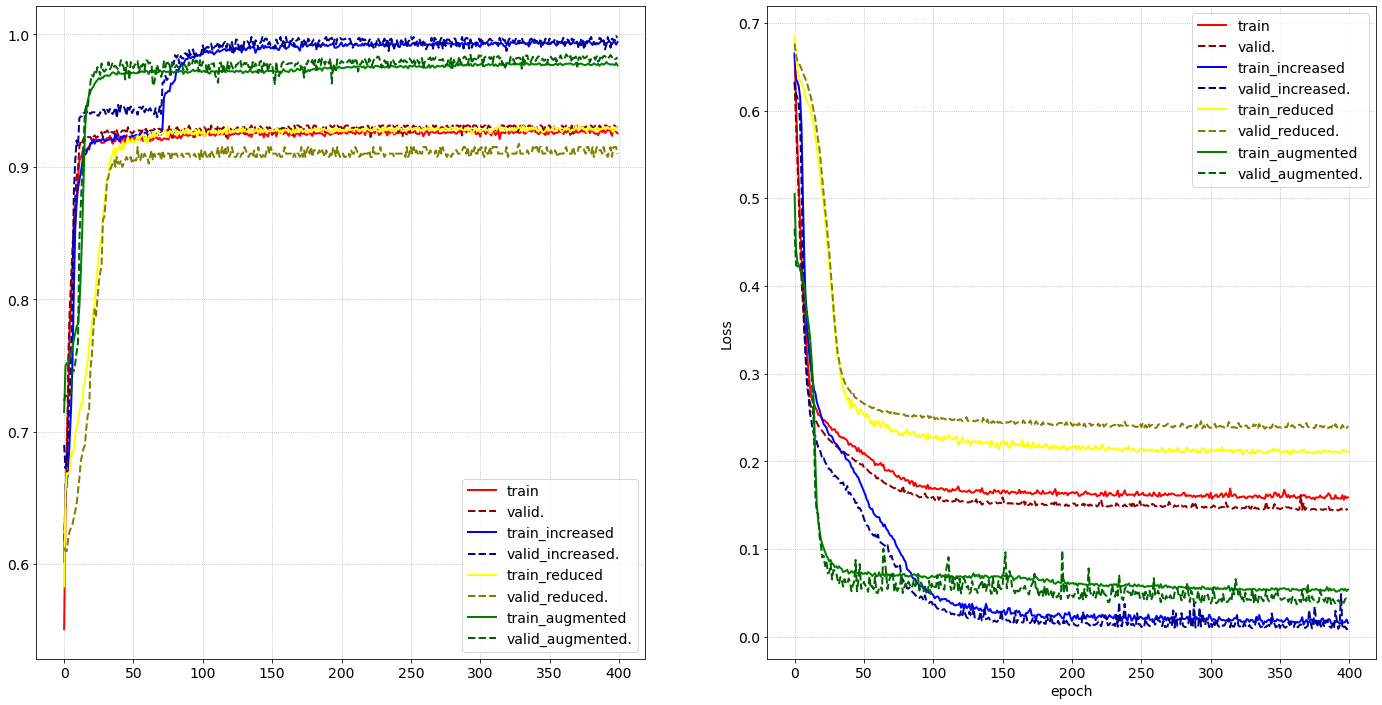

In [40]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [41]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


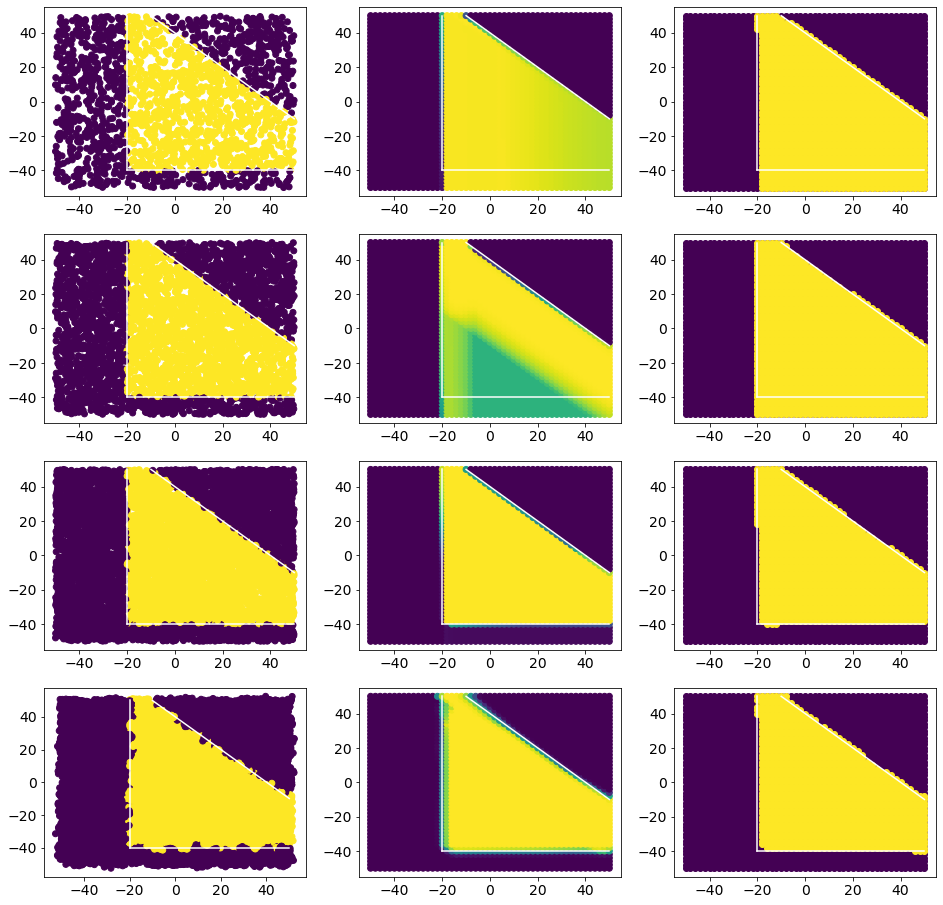

In [42]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 2

## Exercise 3

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 2)                 6         
                                                                 
 dense_49 (Dense)            (None, 20)                60        
                                                                 
 dense_50 (Dense)            (None, 20)                420       
                                                                 
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_13"
___________________________

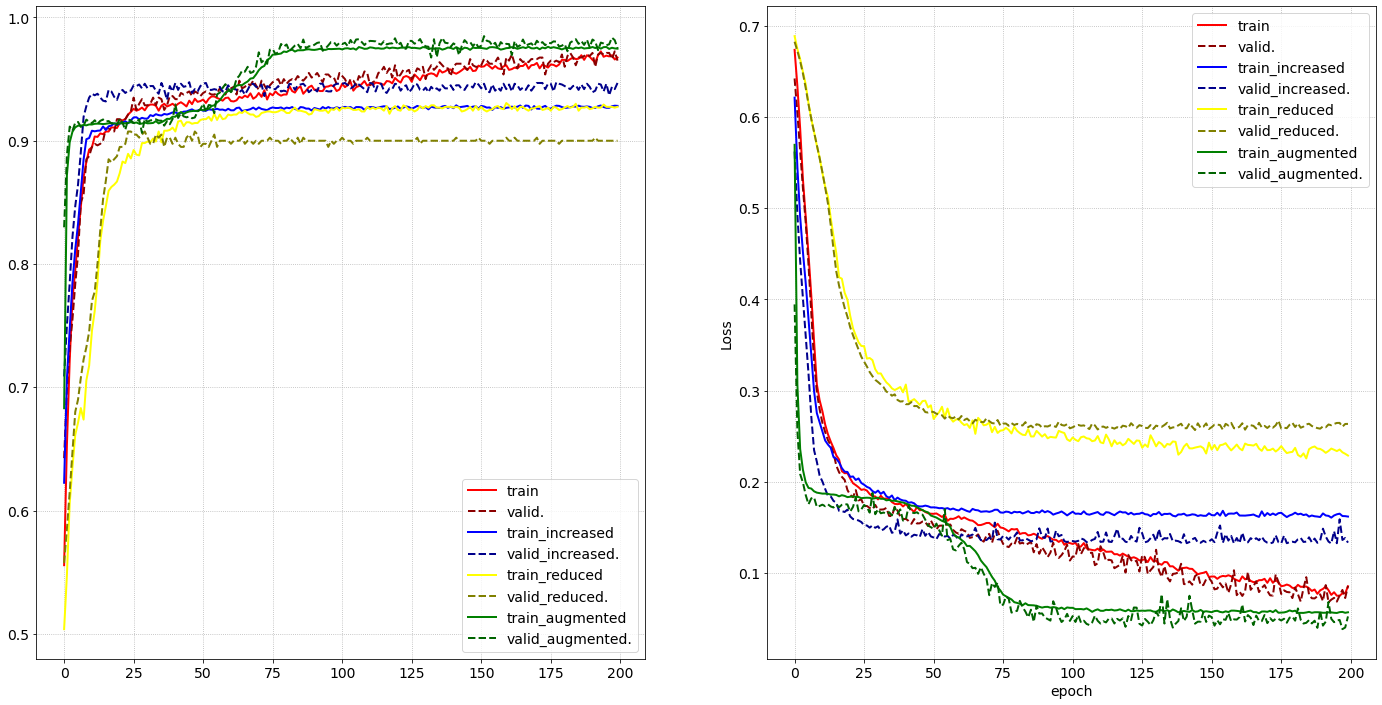

In [67]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

# reproducibility
np.random.seed(12345)


# Reduced set
CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model_red.summary())

model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=0)


# regular set
if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model.summary())

model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)

              

# increased set
if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model_inc.summary())

model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=0)



# augmented set
if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model_aug.summary())

model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=0)


fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()



In [83]:
# NOT FINISHED

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])
print(grid[:,0])
# RESCALE
#grid_r = grid/50
grid_r = grid
print(grid[:,1])
for i in range( grid.shape[0] ):
    grid_r[i,:] = (grid[i,0]/np.sqrt(grid[:,0].var()), grid[i,1]/np.sqrt(grid[:,1].var()))
print(grid_r)
pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]
[-50. -48. -46. ...  46.  48.  50.]
[-50. -50. -50. ...  50.  50.  50.]
[[-1.69841555 -1.69841555]
 [-1.6313831  -1.69935739]
 [-1.56420924 -1.70030148]
 ...
 [16.78740668 17.98594863]
 [18.40081336 19.02928988]
 [20.32743001 20.25462083]]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


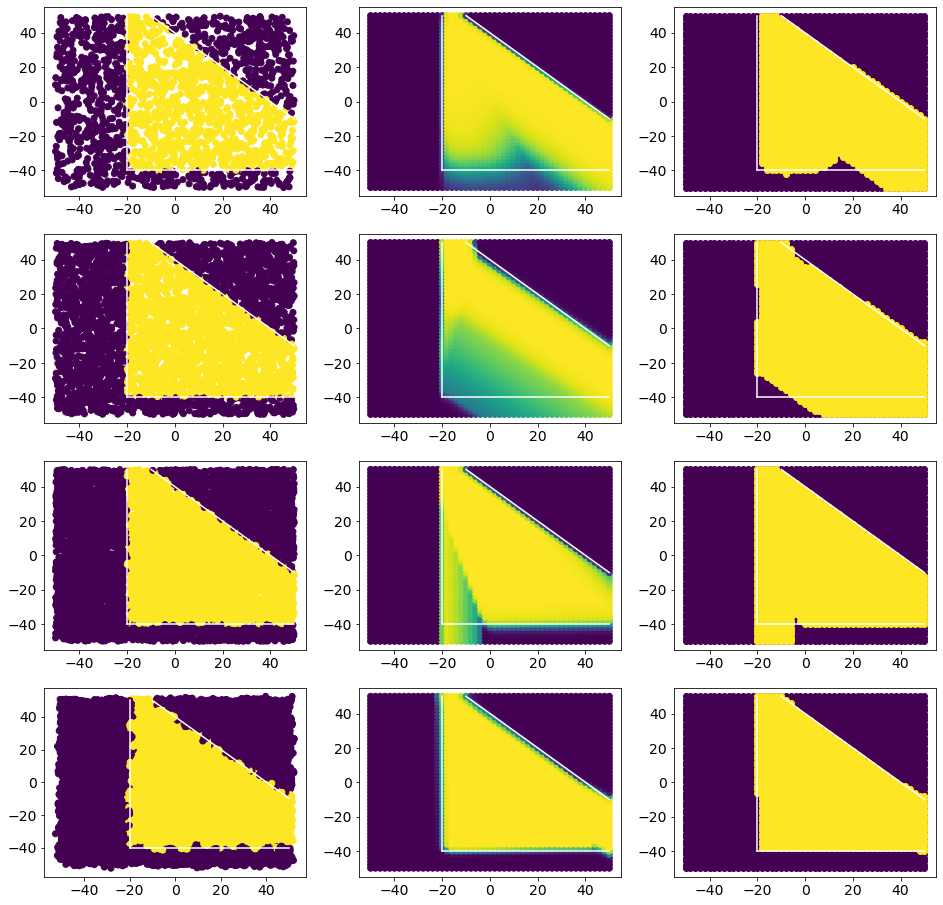

In [54]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
    #ax.plot((-20,-20),(-40,50),c="w")
    #ax.plot((-20,50),(-40,-40),c="w")
    #ax.plot((-10,50),(50,-10),c="w")

fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32b1d953-5e79-45f4-8767-2987a651ec74' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>